<a href="https://colab.research.google.com/github/jasmeen2105/Jasmeen/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')



In [82]:
!pip install kaggle

In [83]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d tongpython/cat-and-dog


cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [84]:
import zipfile

# Unzip the file
with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/cat-and-dog/') # Extract to a new directory

# Update data_path to the extracted directory
data_path = '/content/cat-and-dog'

In [85]:
# Define ImageDataGenerator for data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [86]:
# Load train and validation datasets
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [87]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [88]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [89]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=val_generator.samples // val_generator.batch_size
)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 74s 295ms/step - accuracy: 0.7897 - loss: 0.5695 - val_accuracy: 0.7979 - val_loss: 0.5208
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8438 - loss: 0.4770 - val_accuracy: 0.7989 - val_loss: 0.5208
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 373ms/step - accuracy: 0.7928 - loss: 0.5137 - val_accuracy: 0.7994 - val_loss: 0.5017
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.8438 - loss: 0.4393 - val_accuracy: 0.7979 - val_loss: 0.5035
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 100s 286ms/step - accuracy: 0.8042 - loss: 0.4981 - val_accuracy: 0.7979 - val_loss: 0.5047


In [90]:
# Save the trained model
model.save('/content/cat_dog_classifier.h5')


In [91]:
# Load model and test with a new image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model = load_model('/content/cat_dog_classifier.h5')


In [92]:
def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)[0][0]
    return 'Dog' if prediction > 0.5 else 'Cat'

In [93]:
# Test with an image
img_path = '/content/cat-and-dog/test_set/test_set/cats/cat.4012.jpg' # Update this path
result = predict_image(img_path)
print(f'Predicted Class: {result}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted Class: Dog


In [94]:
history.history['accuracy']

[0.796646237373352, 0.84375, 0.7980227470397949, 0.84375, 0.7983981966972351]

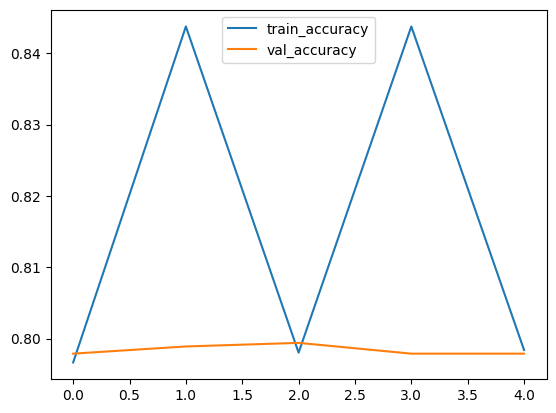

In [95]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
